In [2]:
from image_feature_CLIP import make_image_features
from text_features_topic import make_text_features
from data_prepare import load_csv, feature_concat
from model import prepare_dataframe, prediction, find_metrics
import shap
import pandas as pd
import numpy as np


/Users/dicaristic/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
TRAINING_PATH = 'data/Split Dataset/Training_meme_dataset.csv'
TESTING_PATH = 'data/Split Dataset/Testing_meme_dataset.csv'
VALID_PATH = 'data/Split Dataset/Validation_meme_dataset.csv'

### Loading the Model

In [60]:
X_train, y_train = prepare_dataframe('training_dataset.csv')
X_test, y_test = prepare_dataframe('test_dataset.csv')
X_valid, y_valid = prepare_dataframe('validation_dataset.csv')

eval_set_ = [(X_valid, y_valid)]
preds, model = prediction(eval_set_, X_train, y_train, X_test)
f1, acc = find_metrics(y_test, preds)

print(f'f1 score: {f1}')
print(f'Accuracy score: {acc}')


[0]	validation_0-error:0.46980
[1]	validation_0-error:0.47651
[2]	validation_0-error:0.44295
[3]	validation_0-error:0.44295
[4]	validation_0-error:0.45638
[5]	validation_0-error:0.42953
[6]	validation_0-error:0.43624
[7]	validation_0-error:0.41611
[8]	validation_0-error:0.40940
[9]	validation_0-error:0.38926
[10]	validation_0-error:0.40268
[11]	validation_0-error:0.38926
[12]	validation_0-error:0.40268
[13]	validation_0-error:0.39597
[14]	validation_0-error:0.41611
[15]	validation_0-error:0.42282
[16]	validation_0-error:0.40268
[17]	validation_0-error:0.40940
[18]	validation_0-error:0.39597
f1 score: 0.5771812080536913
Accuracy score: 0.550968667782827


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


### Shap Values

In [18]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

#### Global Feature Importance

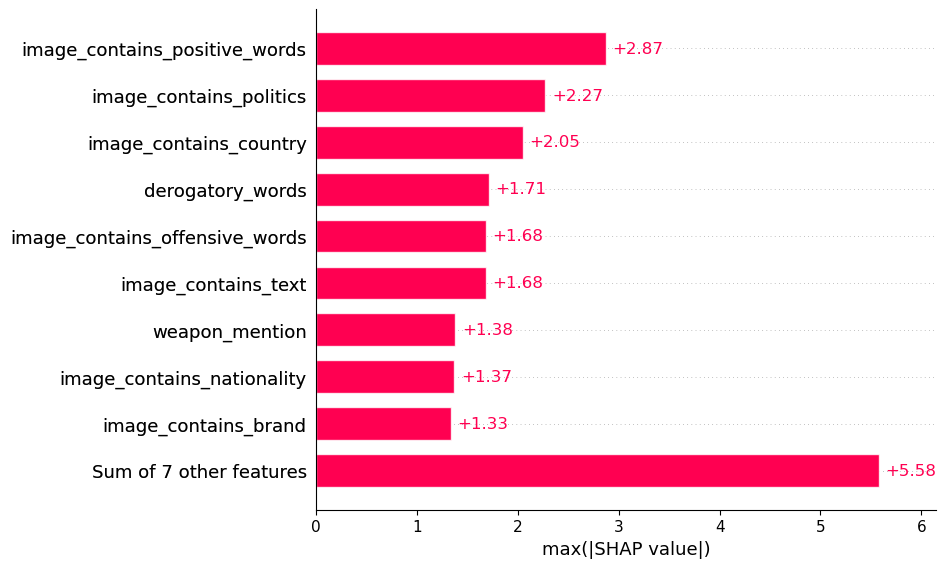

In [24]:
#global feature importance on classificaiton, looking at absolute values. 

shap.plots.bar(shap_values.abs.max(0))


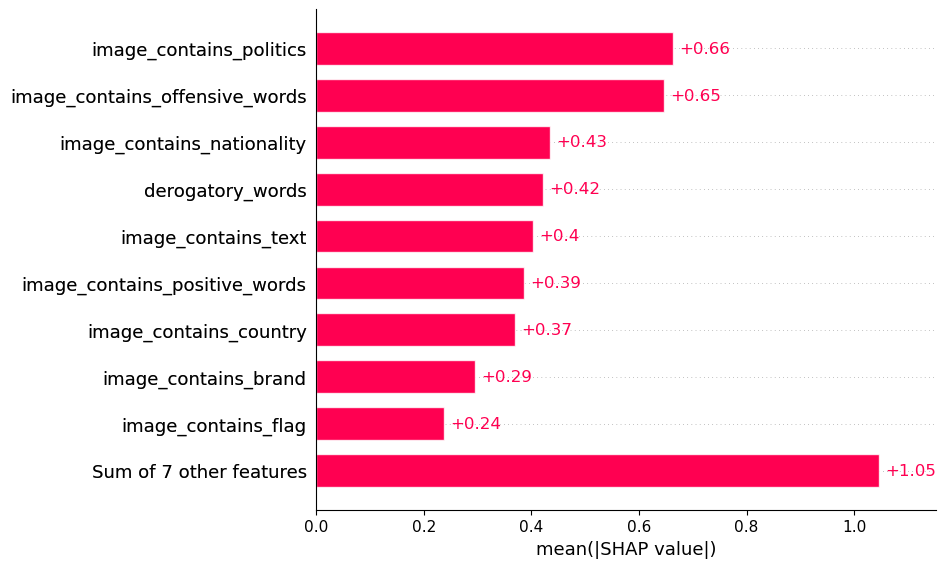

In [20]:
#Global feature importance on predictions looking at average values

shap.plots.bar(shap_values)


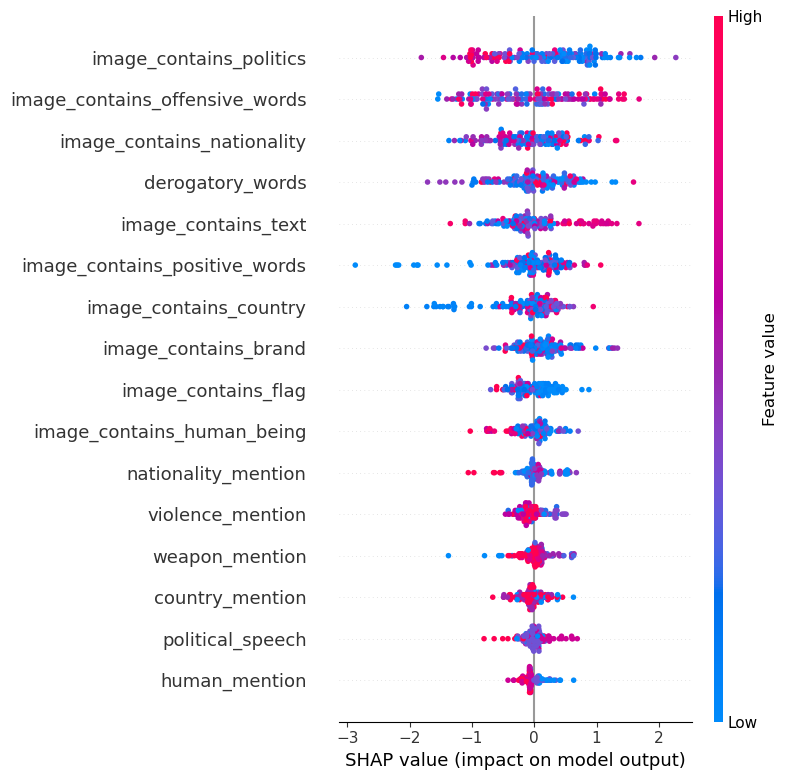

In [19]:
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


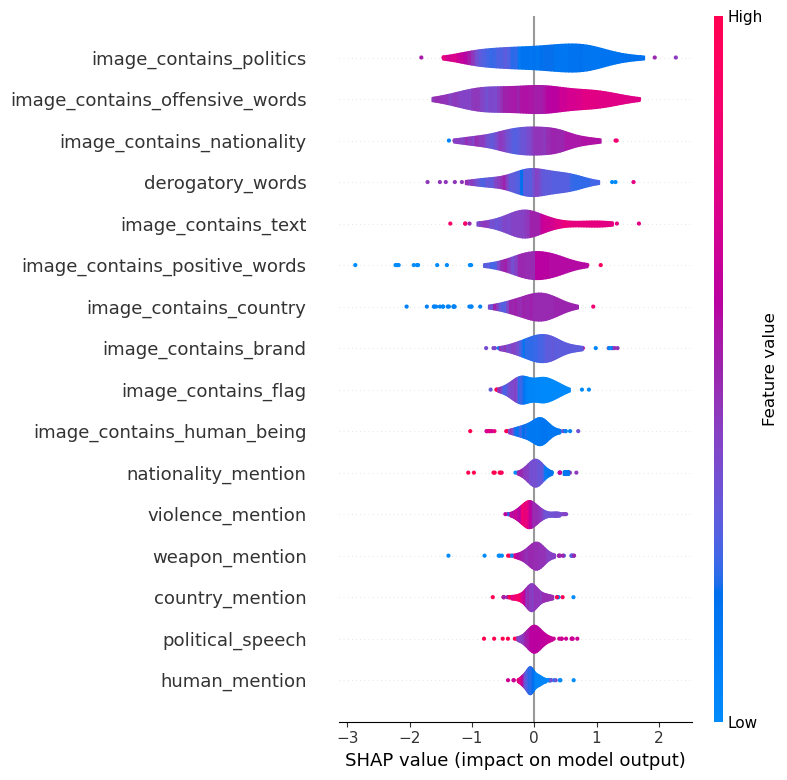

In [25]:
shap.summary_plot(shap_values, plot_type='violin')


#### Local Feature Importance

In [49]:
df_test = pd.read_csv('test_dataset.csv')
df_test.head(10)

,Image Name,image_contains_text,image_contains_offensive_words,image_contains_nationality,image_contains_politics,image_contains_country,image_contains_brand,image_contains_positive_words,image_contains_human_being,image_contains_flag,derogatory_words,nationality_mention,political_speech,country_mention,human_mention,weapon_mention,violence_mention,label
0,so4V8X7.png,0.770,0.135,0.033,0.021,0.016,0.011,0.010,0.003,0.001,0.143,0.143,0.143,0.143,0.143,0.142,0.142,0
1,JYTlRZK.png,0.323,0.233,0.185,0.074,0.073,0.067,0.023,0.012,0.011,0.146,0.143,0.143,0.142,0.142,0.142,0.141,0
2,8Djb33H.png,0.584,0.360,0.016,0.015,0.012,0.005,0.003,0.003,0.002,0.147,0.145,0.144,0.143,0.142,0.141,0.139,0
3,bspb4sM.png,0.708,0.227,0.037,0.011,0.008,0.007,0.001,0.001,0.001,0.145,0.145,0.144,0.143,0.142,0.141,0.140,1
4,qfYlr30.png,0.680,0.206,0.041,0.026,0.015,0.014,0.013,0.004,0.001,0.145,0.143,0.143,0.143,0.143,0.142,0.141,1
5,1BeUIMs.png,0.602,0.343,0.024,0.011,0.010,0.004,0.004,0.002,0.001,0.147,0.144,0.144,0.143,0.142,0.142,0.140,1
6,lJVnWF2.png,0.698,0.256,0.015,0.011,0.011,0.005,0.002,0.001,0.001,0.148,0.148,0.143,0.141,0.141,0.140,0.140,1
7,VoNgxAD.png,0.425,0.360,0.093,0.048,0.040,0.014,0.010,0.005,0.004,0.147,0.145,0.144,0.143,0.142,0.140,0.139,0
8,taecqiR.png,0.369,0.323,0.093,0.075,0.041,0.037,0.031,0.016,0.015,0.146,0.144,0.143,0.142,0.142,0.142,0.141,1
9,CjZPiloXAAA1v_W.jpg,0.614,0.256,0.047,0.030,0.027,0.010,0.006,0.006,0.005,0.156,0.153,0.146,0.143,0.137,0.133,0.132,0


shap_values[0] -> so4V8X7.png
Label: Non-offensive
Prediction: Offensive


shap_values[1] -> JYTlRZK.png	
Label: Non-offensive
Prediction: Non-offensive

shap_values[3] -> bspb4sM.png	
Label: offensive
Prediction: Non-offensive


shap_values[6] -> lJVnWF2.png
Label: Offensive
Prediction: Offensive


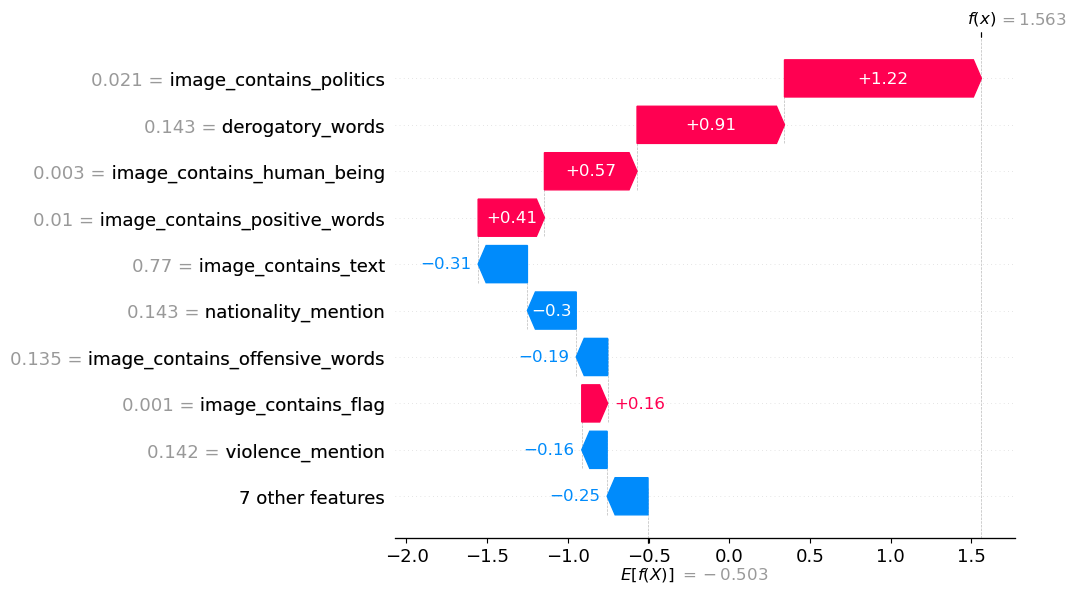

In [22]:
shap.plots.waterfall(shap_values[0])


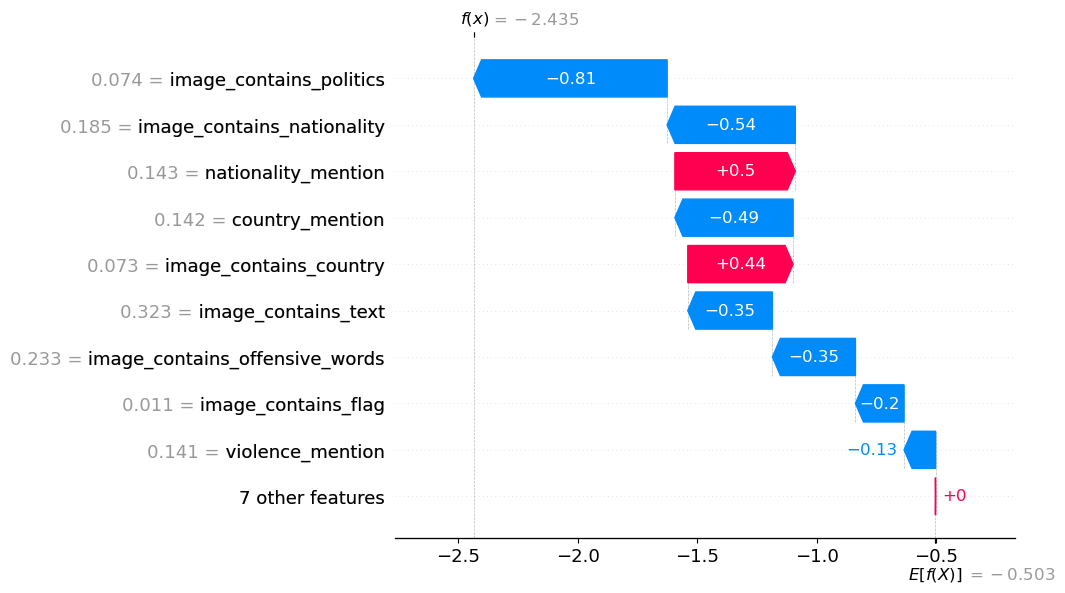

In [50]:
shap.plots.waterfall(shap_values[1])


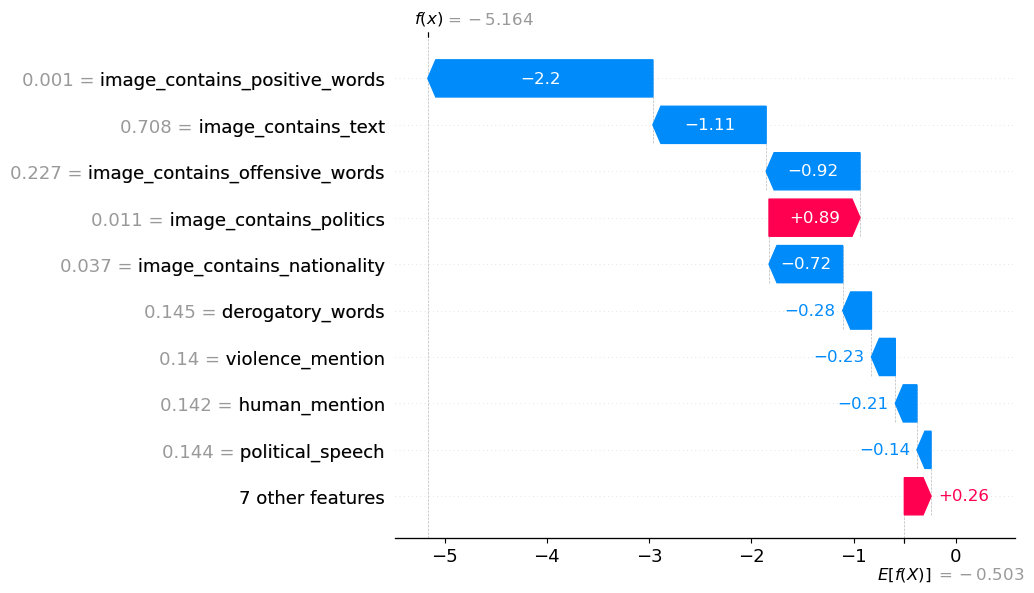

In [52]:
shap.plots.waterfall(shap_values[3])


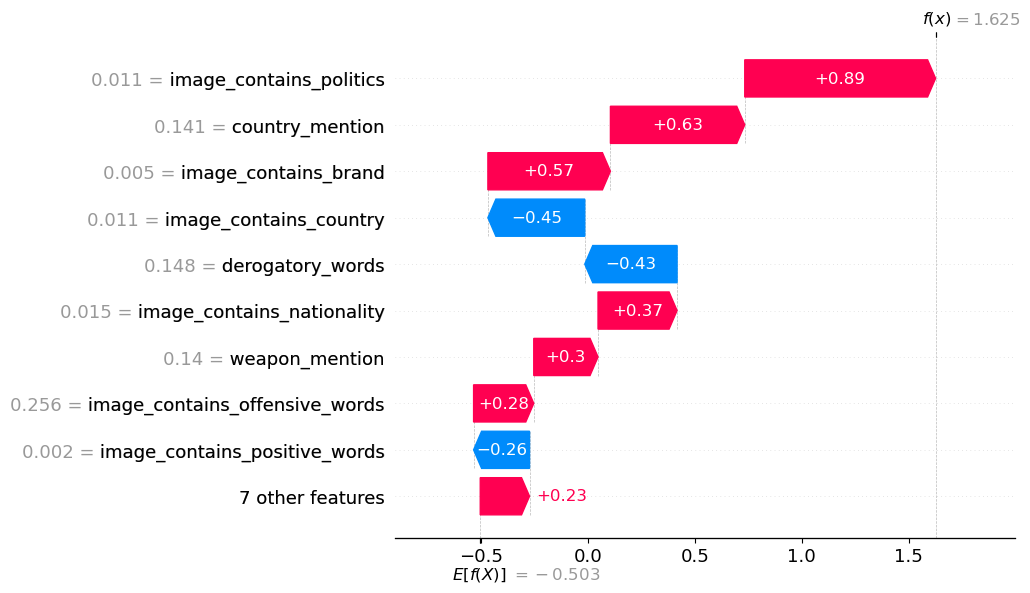

In [51]:
shap.plots.waterfall(shap_values[6])


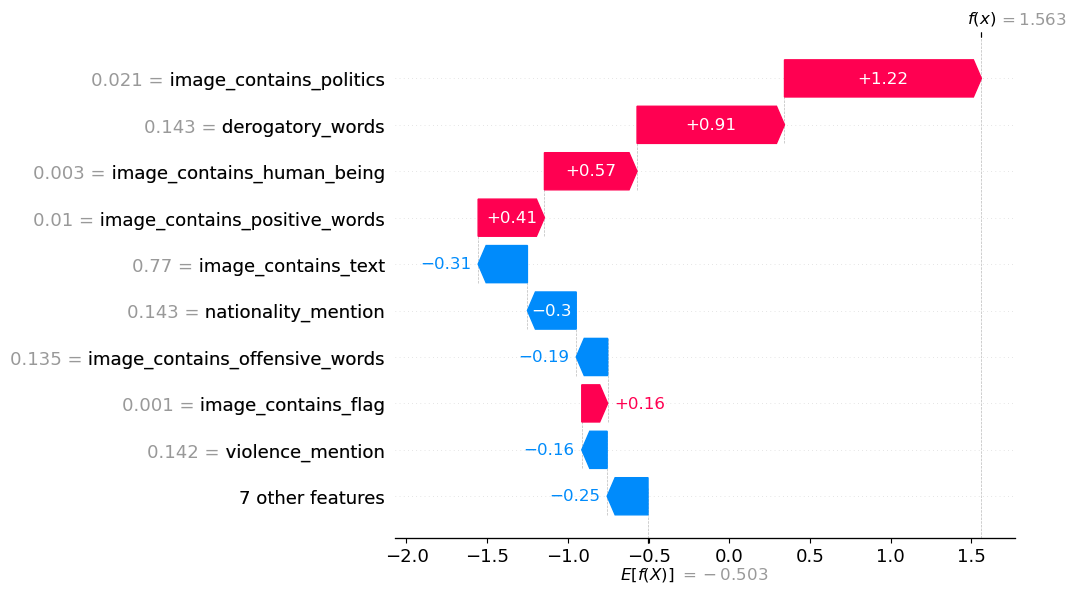

In [53]:
shap.plots.waterfall(shap_values[0])


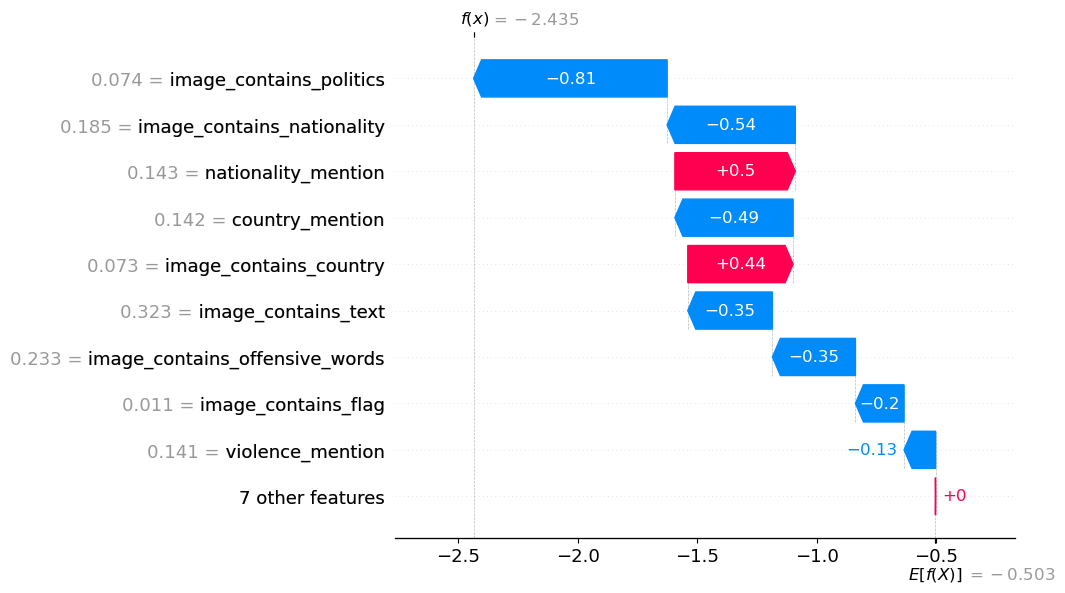

In [54]:
shap.plots.waterfall(shap_values[1])


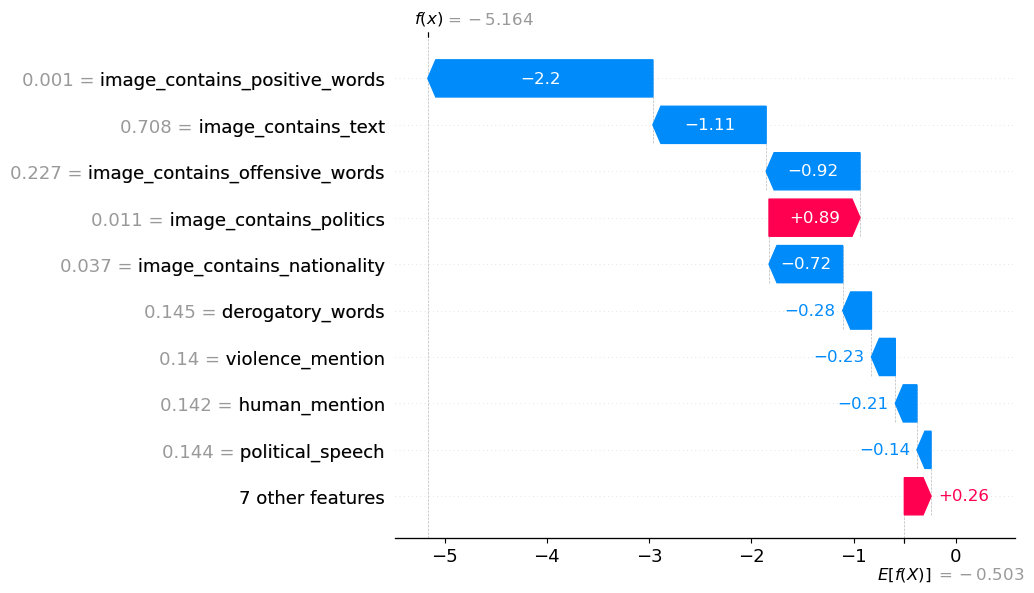

In [55]:
shap.plots.waterfall(shap_values[3])


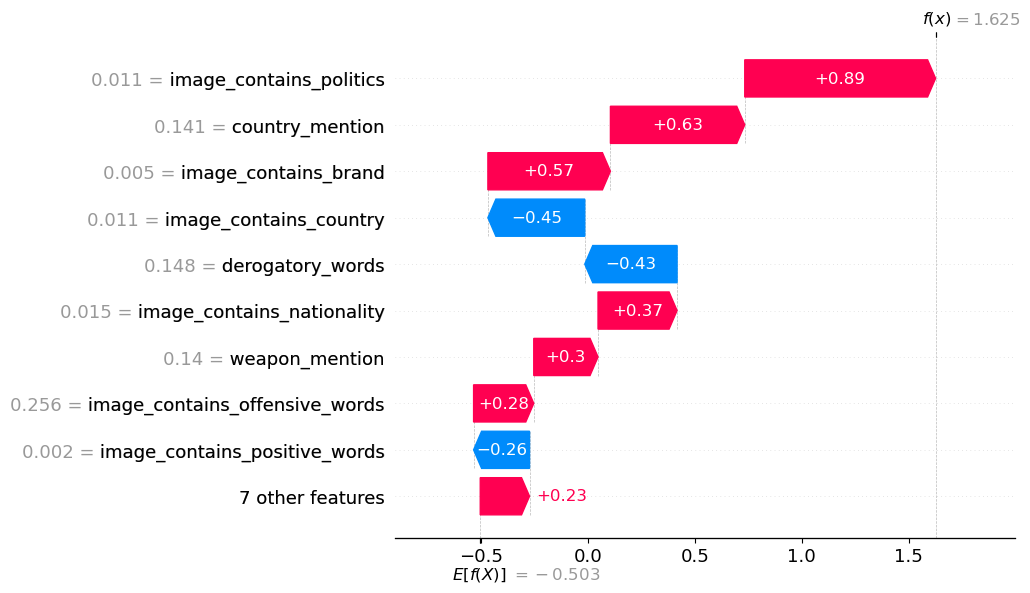

In [56]:
shap.plots.waterfall(shap_values[6])
